## Generate platemap(s) for batch of processes data with percentage of image sets failed

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(platetools))


Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘platetools’ was built under R version 4.2.3”


In [2]:
# Output directory for the plots
output_directory <- "./qc_plots"
# Create the output directory if it doesn't exist
if (!dir.exists(output_directory)) {
  dir.create(output_directory)
}

# Set the name of batch being processed
batch_name <- "batch_1"

# Define the directory containing the folders for each plate
illum_directory <- paste0("../illum_directory/", batch_name)

# List all CSV files in the directory and its subdirectories
csv_files <- list.files(illum_directory, pattern = "\\Image.csv$", full.names = TRUE, recursive = TRUE)

# Read and concatenate all CSV files into a single data frame
illum_data <- bind_rows(lapply(csv_files, read.csv))

# Display the first few rows of the concatenated data
head(illum_data)


,ExecutionTime_01Images,ExecutionTime_02Metadata,ExecutionTime_03NamesAndTypes,ExecutionTime_04Groups,ExecutionTime_05MeasureImageQuality,ExecutionTime_06FlagImage,FileName_OrigActin,FileName_OrigDNA,FileName_OrigER,FileName_OrigMito,⋯,URL_OrigActin,URL_OrigDNA,URL_OrigER,URL_OrigMito,URL_OrigPM,Width_OrigActin,Width_OrigDNA,Width_OrigER,Width_OrigMito,Width_OrigPM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,0,0,1.73,0,2.64,0.00,CARD-CelIns-CX7_250521130001_B02f00d4.TIF,CARD-CelIns-CX7_250521130001_B02f00d0.TIF,CARD-CelIns-CX7_250521130001_B02f00d1.TIF,CARD-CelIns-CX7_250521130001_B02f00d3.TIF,⋯,file:/home/jenna/Way%20Science%20Lab%20Dropbox/Jenna%20%20Tomkinson/McKinseyLab_WayLab_CardiacFibroblasts/Compound%20Screen/Plate%201/CARD-CelIns-CX7_250521130001/CARD-CelIns-CX7_250521130001_B02f00d4.TIF,file:/home/jenna/Way%20Science%20Lab%20Dropbox/Jenna%20%20Tomkinson/McKinseyLab_WayLab_CardiacFibroblasts/Compound%20Screen/Plate%201/CARD-CelIns-CX7_250521130001/CARD-CelIns-CX7_250521130001_B02f00d0.TIF,file:/home/jenna/Way%20Science%20Lab%20Dropbox/Jenna%20%20Tomkinson/McKinseyLab_WayLab_CardiacFibroblasts/Compound%20Screen/Plate%201/CARD-CelIns-CX7_250521130001/CARD-CelIns-CX7_250521130001_B02f00d1.TIF,file:/home/jenna/Way%20Science%20Lab%20Dropbox/Jenna%20%20Tomkinson/McKinseyLab_WayLab_CardiacFibroblasts/Compound%20Screen/Plate%201/CARD-CelIns-CX7_250521130001/CARD-CelIns-CX7_250521130001_B02f00d3.TIF,file:/home/jenna/Way%20Science%20Lab%20Dropbox/Jenna%20%20Tomkinson/McKinseyLab_WayLab_CardiacFibroblasts/Compound%20Screen/Plate%201/CARD-CelIns-CX7_250521130001/CARD-CelIns-CX7_250521130001_B02f00d2.TIF,1104,1104,1104,1104,1104
2,0,0,1.51,0,2.07,0.00,CARD-CelIns-CX7_250521130001_B02f01d4.TIF,CARD-CelIns-CX7_250521130001_B02f01d0.TIF,CARD-CelIns-CX7_250521130001_B02f01d1.TIF,CARD-CelIns-CX7_250521130001_B02f01d3.TIF,⋯,file:/home/jenna/Way%20Science%20Lab%20Dropbox/Jenna%20%20Tomkinson/McKinseyLab_WayLab_CardiacFibroblasts/Compound%20Screen/Plate%201/CARD-CelIns-CX7_250521130001/CARD-CelIns-CX7_250521130001_B02f01d4.TIF,file:/home/jenna/Way%20Science%20Lab%20Dropbox/Jenna%20%20Tomkinson/McKinseyLab_WayLab_CardiacFibroblasts/Compound%20Screen/Plate%201/CARD-CelIns-CX7_250521130001/CARD-CelIns-CX7_250521130001_B02f01d0.TIF,file:/home/jenna/Way%20Science%20Lab%20Dropbox/Jenna%20%20Tomkinson/McKinseyLab_WayLab_CardiacFibroblasts/Compound%20Screen/Plate%201/CARD-CelIns-CX7_250521130001/CARD-CelIns-CX7_250521130001_B02f01d1.TIF,file:/home/jenna/Way%20Science%20Lab%20Dropbox/Jenna%20%20Tomkinson/McKinseyLab_WayLab_CardiacFibroblasts/Compound%20Screen/Plate%201/CARD-CelIns-CX7_250521130001/CARD-CelIns-CX7_250521130001_B02f01d3.TIF,file:/home/jenna/Way%20Science%20Lab%20Dropbox/Jenna%20%20Tomkinson/McKinseyLab_WayLab_CardiacFibroblasts/Compound%20Screen/Plate%201/CARD-CelIns-CX7_250521130001/CARD-CelIns-CX7_250521130001_B02f01d2.TIF,1104,1104,1104,1104,1104
3,0,0,0.94,0,2.11,0.01,CARD-CelIns-CX7_250521130001_B02f02d4.TIF,CARD-CelIns-CX7_250521130001_B02f02d0.TIF,CARD-CelIns-CX7_250521130001_B02f02d1.TIF,CARD-CelIns-CX7_250521130001_B02f02d3.TIF,⋯,file:/home/jenna/Way%20Science%20Lab%20Dropbox/Jenna%20%20Tomkinson/McKinseyLab_WayLab_CardiacFibroblasts/Compound%20Screen/Plate%201/CARD-CelIns-CX7_250521130001/CARD-CelIns-CX7_250521130001_B02f02d4.TIF,file:/home/jenna/Way%20Science%20Lab%20Dropbox/Jenna%20%20Tomkinson/McKinseyLab_WayLab_CardiacFibroblasts/Compound%20Screen/Plate%201/CARD-CelIns-CX7_250521130001/CARD-CelIns-CX7_250521130001_B02f02d0.TIF,file:/home/jenna/Way%20Science%20Lab%20Dropbox/Jenna%20%20Tomkinson/McKinseyLab_WayLab_CardiacFibroblasts/Compound%20Screen/Plate%201/CARD-CelIns-CX7_250521130001/CARD-CelIns-CX7_250521130001_B02f02d1.TIF,file:/home/jenna/Way%20Science%20Lab%20Dropbox/Jenna%20%20Tomkinson/McKinseyLab_WayLab_CardiacFibroblasts/Compound%20Screen/Plate%201/CARD-CelIns-CX7_250521130001/CARD-CelIns-CX7_250521130001_B02f02d3.TIF,file:/home

In [3]:
well_qc_data <- illum_data %>%
  mutate(Failing_FOV = (Metadata_Blur_Flag == 1 | Metadata_Saturation_Flag == 1)) %>%
  group_by(Metadata_Plate, Metadata_Well) %>%
  summarise(
    Total_FOVs = n(),
    Count_Failing = sum(Failing_FOV),
    Percent_Failing = 100 * Count_Failing / Total_FOVs,
    .groups = "drop"
  )

head(well_qc_data)


Metadata_Plate,Metadata_Well,Total_FOVs,Count_Failing,Percent_Failing
<chr>,<chr>,<int>,<int>,<dbl>
CARD-CelIns-CX7_250521130001,B02,49,36,73.469388
CARD-CelIns-CX7_250521130001,B03,49,18,36.734694
CARD-CelIns-CX7_250521130001,B04,49,7,14.285714
CARD-CelIns-CX7_250521130001,B05,49,27,55.102041
CARD-CelIns-CX7_250521130001,B06,49,3,6.122449
CARD-CelIns-CX7_250521130001,B07,49,4,8.163265


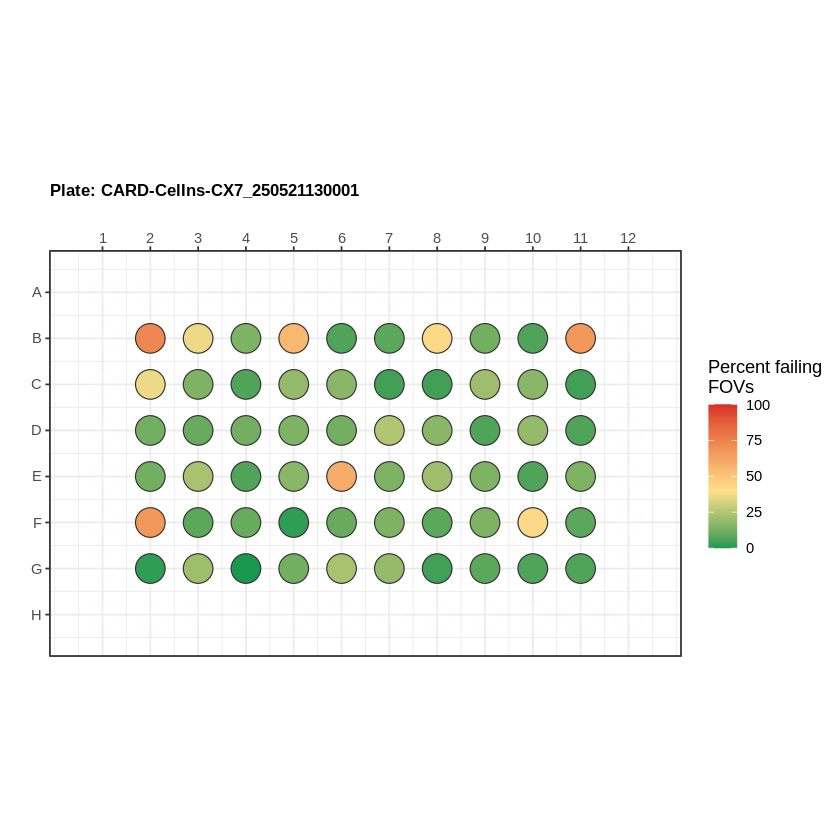

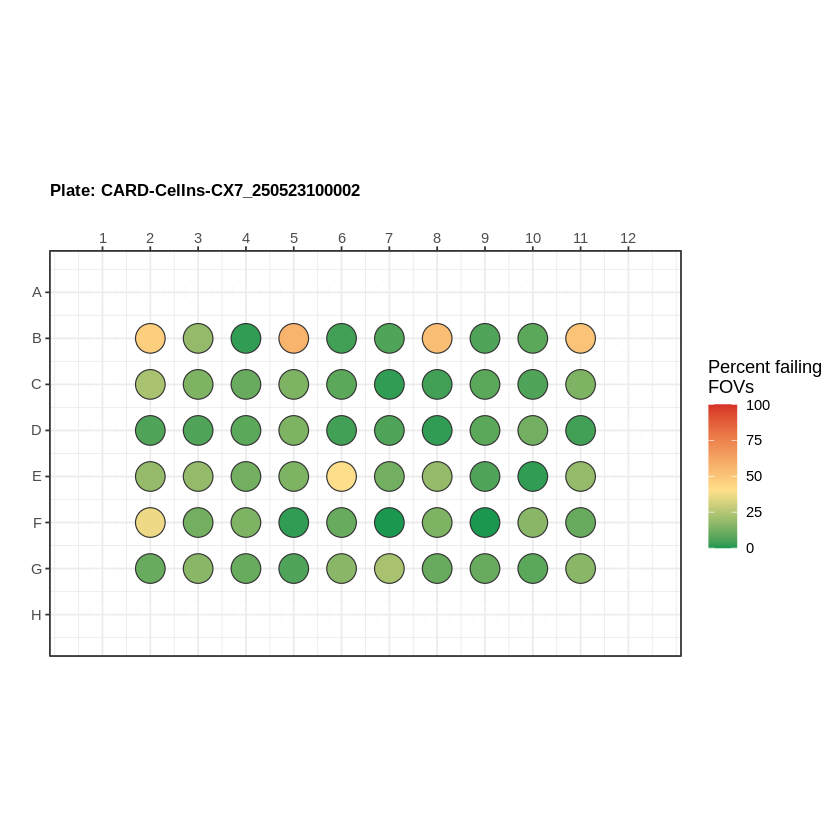

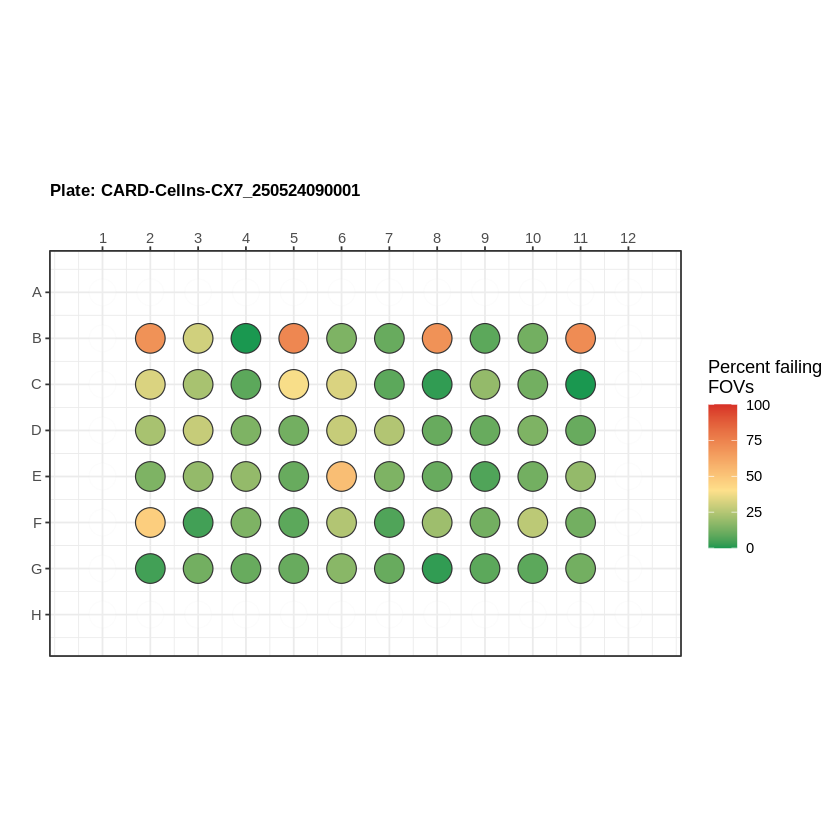

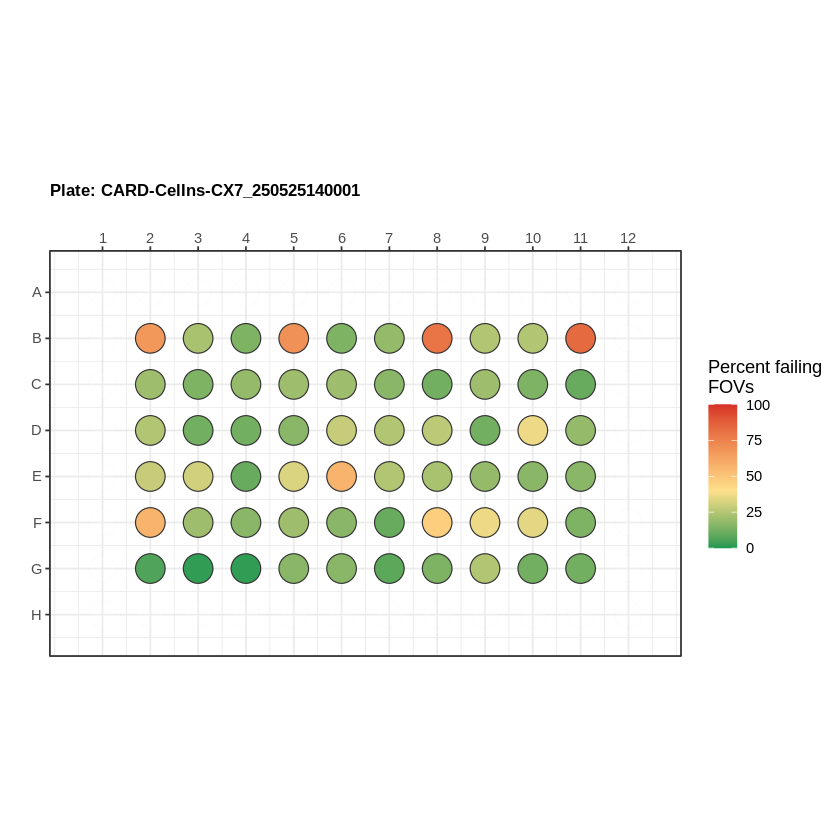

In [4]:
# Generate platemaps for each Plate
unique_plates <- unique(illum_data$Metadata_Plate)

for (plate in unique_plates) {
    plate_data <- well_qc_data %>%
        filter(Metadata_Plate == plate)

    fov_platemap <- platetools::raw_map(
        data = plate_data$Percent_Failing,
        well = plate_data$Metadata_Well,
        plate = 96,
        size = 8
    ) +
        ggtitle(paste("Plate:", plate)) +
        theme(plot.title = element_text(size = 10, face = "bold")) +
        scale_fill_gradientn(
            name = "Percent failing\nFOVs",
            colors = c("#1a9850", "#fee08b", "#d73027"), # green → yellow → red
            values = scales::rescale(c(0, 40, 100)),
            limits = c(0, 100)
        )

    print(fov_platemap)
}


In [5]:
merged_well_qc_data <- illum_data %>%
  mutate(Failing_FOV = (Metadata_Blur_Flag == 1 | Metadata_Saturation_Flag == 1)) %>%
  group_by(Metadata_Well) %>%
  summarise(
    Total_FOVs = n(),
    Count_Failing = sum(Failing_FOV),
    Percent_Failing = 100 * Count_Failing / Total_FOVs,
    .groups = "drop"
  )

head(merged_well_qc_data)


Metadata_Well,Total_FOVs,Count_Failing,Percent_Failing
<chr>,<int>,<int>,<dbl>
B02,196,126,64.285714
B03,196,53,27.040816
B04,196,15,7.653061
B05,196,125,63.775510
B06,196,19,9.693878
B07,196,21,10.714286


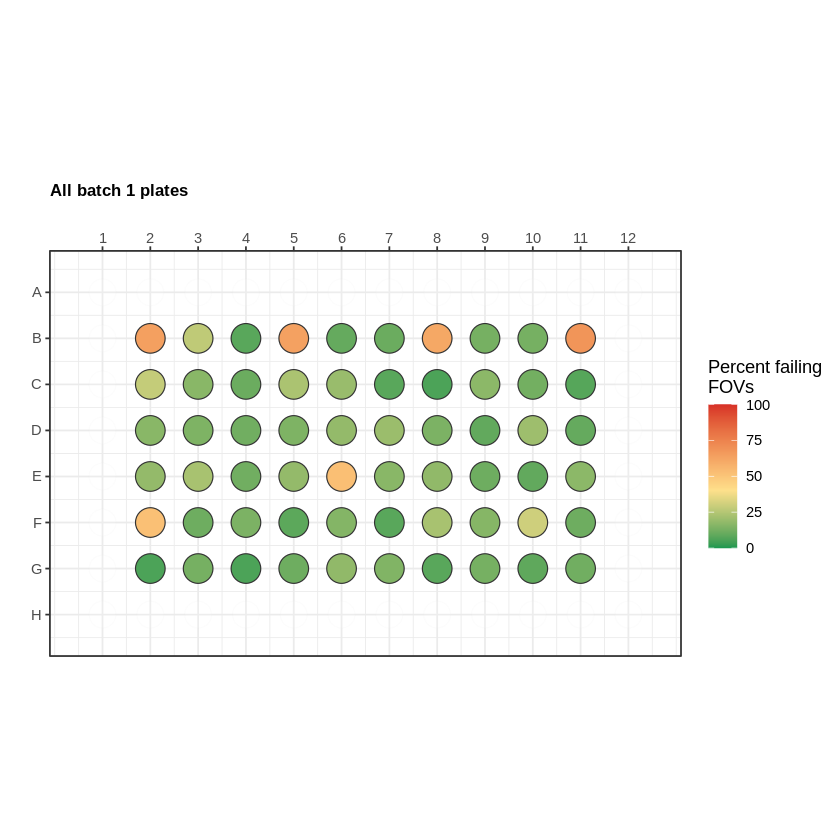

In [6]:
merged_fov_platemap <- platetools::raw_map(
    data = merged_well_qc_data$Percent_Failing,
    well = merged_well_qc_data$Metadata_Well,
    plate = 96,
    size = 8
) +
    ggtitle(paste("All batch 1 plates")) +
    theme(plot.title = element_text(size = 10, face = "bold")) +
    scale_fill_gradientn(
        name = "Percent failing\nFOVs",
        colors = c("#1a9850", "#fee08b", "#d73027"), # green → yellow → red
        values = scales::rescale(c(0, 40, 100)),
        limits = c(0, 100)
    )

# Save the merged plot to the output directory
output_file_merged <- file.path(output_directory, "merged_batch1_fov_platemap.png")
ggsave(output_file_merged, plot = merged_fov_platemap, width = 8, height = 6)

print(merged_fov_platemap)
